In [11]:
# display some images for every different expression

import numpy as np
import seaborn as sns
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = ".\home\images\\"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

FileNotFoundError: ignored

<Figure size 864x1440 with 0 Axes>

# Image augmentation using keras ImageDataGenerator

In [ ]:
# building data generator 

# from tensorflow.keras.utils import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
base_path = "./images/"

## Here we are doing data augmentation. 
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)


## Here we are specifying training and testing data path. 
train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Defining our 4 Convolution and 2 Dense layers model

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1


2022-07-07 20:38:51.846172: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-07 20:38:51.846815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2

/Users/furqan/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# number of epochs to train the NN
epochs = 30

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/30


/var/folders/vg/rwnl83p91n511pkzr1y7p82r0000gn/T/ipykernel_12500/2327611113.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,
2022-07-07 20:41:21.362825: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-07 20:41:21.978576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 1.9549 - accuracy: 0.2225

2022-07-07 20:42:36.072803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.17443, saving model to model_weights.h5
225/225 [==============================] - 79s 328ms/step - loss: 1.9549 - accuracy: 0.2225 - val_loss: 1.8759 - val_accuracy: 0.1744
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 1.8385 - accuracy: 0.2586
Epoch 2: val_accuracy improved from 0.17443 to 0.27741, saving model to model_weights.h5
225/225 [==============================] - 72s 320ms/step - loss: 1.8385 - accuracy: 0.2586 - val_loss: 1.8932 - val_accuracy: 0.2774
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 1.7853 - accuracy: 0.2845
Epoch 3: val_accuracy improved from 0.27741 to 0.30071, saving model to model_weights.h5
225/225 [==============================] - 72s 321ms/step - loss: 1.7853 - accuracy: 0.2845 - val_loss: 1.7579 - val_accuracy: 0.3007
Epoch 4/30
225/225 [==============================] - ETA: 0s - loss: 1.7385 - accuracy: 0.3115
Epoch 4: val_accuracy improved from 0.30071 t

Epoch 28/30
225/225 [==============================] - ETA: 0s - loss: 1.1964 - accuracy: 0.5427
Epoch 28: val_accuracy did not improve from 0.57699
225/225 [==============================] - 74s 329ms/step - loss: 1.1964 - accuracy: 0.5427 - val_loss: 1.1785 - val_accuracy: 0.5572
Epoch 29/30
225/225 [==============================] - ETA: 0s - loss: 1.1814 - accuracy: 0.5499
Epoch 29: val_accuracy did not improve from 0.57699
225/225 [==============================] - 73s 322ms/step - loss: 1.1814 - accuracy: 0.5499 - val_loss: 1.2062 - val_accuracy: 0.5445
Epoch 30/30
225/225 [==============================] - ETA: 0s - loss: 1.1788 - accuracy: 0.5489
Epoch 30: val_accuracy did not improve from 0.57699
225/225 [==============================] - 72s 322ms/step - loss: 1.1788 - accuracy: 0.5489 - val_loss: 1.1715 - val_accuracy: 0.5580


In [ ]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

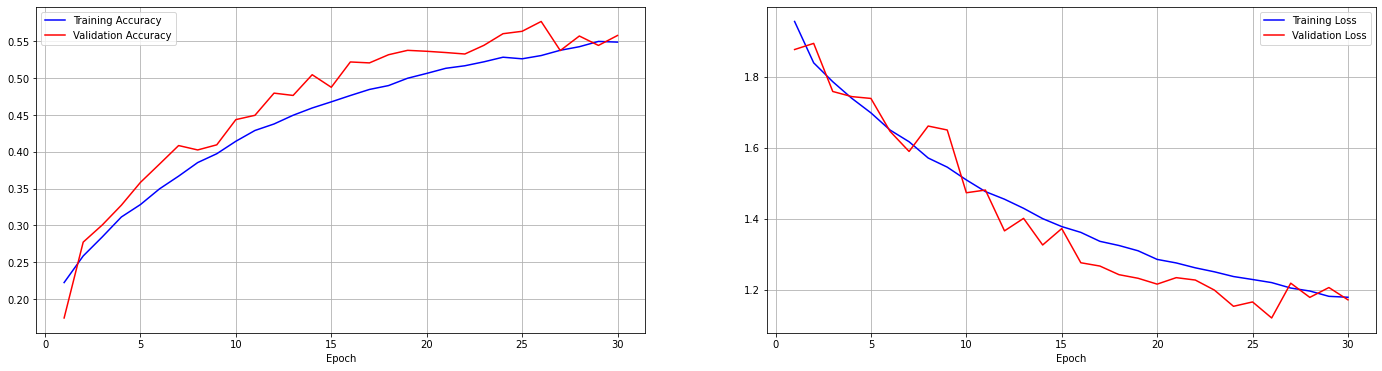

Best Validation Accuracy Score 0.57699, is for epoch 26


In [ ]:
plot_results(history)
best_epoch =get_best_epcoh(history)

# Connecting with openCV

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import model_from_json

In [ ]:
model_json_file = './model.json'
model_weights_file = './model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)

In [ ]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [ ]:
#cap = cv2.VideoCapture(0)
#import copy

while True:
    
    #ret, frame = cap.read()
    #img = copy.deepcopy(frame)
    img = cv2.imread('./test_data/fear2.jpeg')
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        fc = gray[y:y+h, x:x+w]
        
        roi = cv2.resize(fc, (48,48))
        pred = loaded_model.predict(roi[np.newaxis, :, :, np.newaxis])
        text_idx=np.argmax(pred)
        text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        if text_idx == 0:
            text= text_list[0]
        if text_idx == 1:
            text= text_list[1]
        elif text_idx == 2:
            text= text_list[2]
        elif text_idx == 3:
            text= text_list[3]
        elif text_idx == 4:
            text= text_list[4]
        elif text_idx == 5:
            text= text_list[5]
        elif text_idx == 6:
            text= text_list[6]
        #cv2.putText(img, text, (x, y-5),
           #cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
        #img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
        print(text)
    break
            
    
    #cv2.imshow("frame", img)
    #key = cv2.waitKey(1) & 0xFF
    #if key== ord('q'):
        #break
    
#cap.release()
#cv2.destroyAllWindows()

1/1 [==============================] - 0s 13ms/step
Angry


In [ ]:
# install these libraries

# pip install opencv-python
# keras
# tensorflow
# seaborn
# matplotlib
# 